In [1]:
from datetime import datetime
import pandas_datareader.data as web

stocks = ["ge", "intc", "amd", "gold", "spy", "ko", "pep"]
start, end = datetime(2017, 1, 1), datetime(2020, 1, 1)
df = web.DataReader(stocks, "yahoo", start=start, end=end)
df_prices = df["Adj Close"]

In [2]:
%load_ext autoreload
%autoreload 2
from simustocks.stocks import Stocks
from simustocks.simulation import Simulation

stocks_history = Stocks(df=df_prices)
expected_returns = {
    "ge": -0.8,
    "intc": 1,
    "amd": -0.1,
    "gold": -0.5,
    "spy": -0.99,
    "ko": 0.08,
    "pep": 0.01,
}
simu = Simulation(stocks_history, er=expected_returns, m=254)

In [3]:
init_prices = stocks_history.df.to_numpy()[-1:, :]  # (1, k)
future_returns, future_cov, future_prices = simu(order=12)

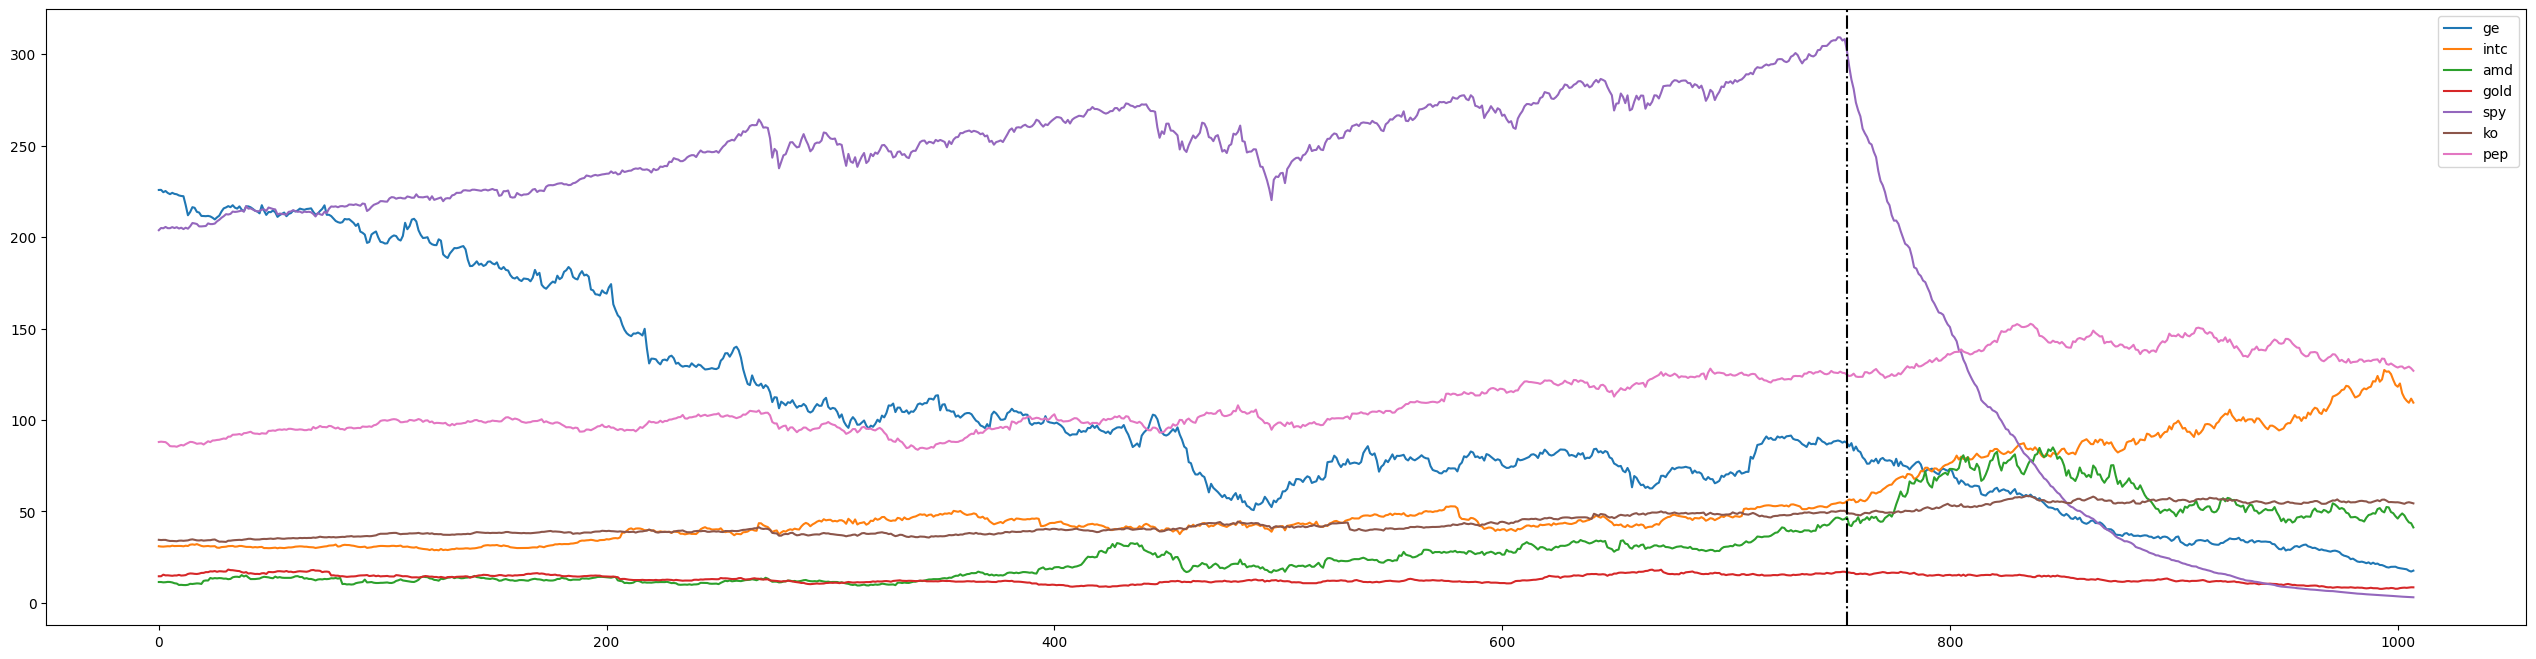

In [4]:
import numpy as np
import matplotlib.pyplot as plt

n = stocks_history.df.to_numpy().shape[0]
m = future_prices.shape[0]

# legend
stocks_names = stocks_history.df.columns
k = len(stocks_names)

prices = np.vstack((stocks_history.prices.T, future_prices[1:, :]))  # shape (n + m, k)

fig, ax = plt.subplots(figsize=(32, 8))
ax.plot(prices, label=stocks_names)
ax.axvline(x=n, ymin=0, ymax=1, c="black", linestyle="-.")
ax.legend();

Verify that the covariance are the same.

In [5]:
import numpy.typing as npt


def get_returns(array: npt.NDArray) -> npt.NDArray:
    # array (n, k)
    return np.diff(array, axis=0) / array[:-1, :]


future_returns = get_returns(future_prices)
future_cov = np.cov(future_returns.T)
history_returns = get_returns(stocks_history.prices.T)
history_cov = np.cov(history_returns.T)
np.allclose(history_cov, future_cov)

True